#Differentiated Thyroid Cancer Recurrence

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset-"https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence"

##Description
Thyroid cancer is the most common endocrine malignancy . Multiple histological types of thyroid cancer have been described, including papillary thyroid cancer (PTC) and anaplastic thyroid cancer (ATC). PTC, the well-differentiated type, accounts for more than 80% of all thyroid cancers and has a clinically favorable prognosis with more than 90% 10-year disease-specific survival.

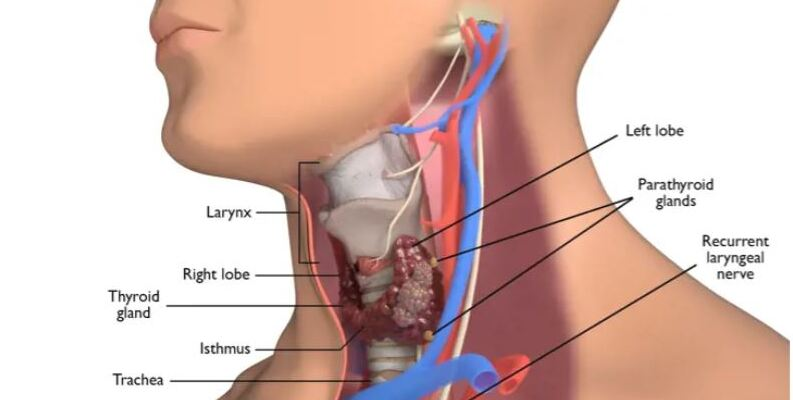

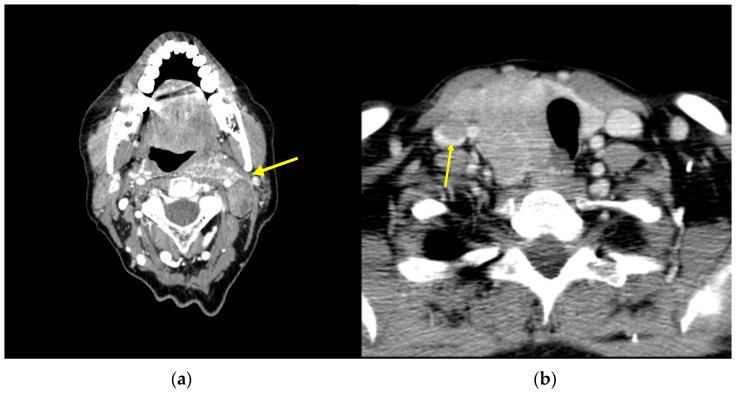

Axial CT scan image: (a) neck recurrence (arrow) of DTC affecting the great vessels; (b) DTC infiltrating the esophagus and internal jugular vein (arrow).

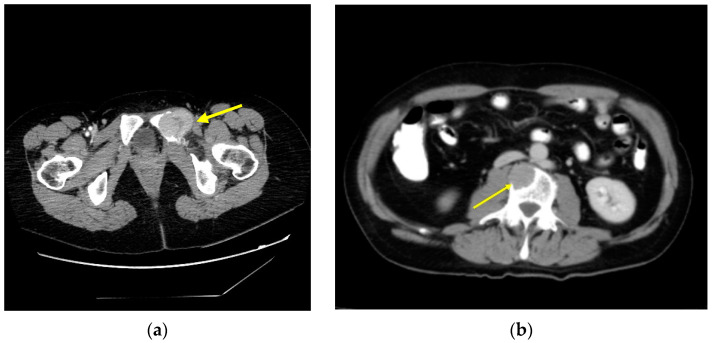

Axial CT scan image: (a) bone metastasis of DTC affecting the left ischium (arrow); (b) bone metastasis in a lumbar vertebral body (arrow).

In [ ]:
thyroid_df=pd.read_csv("/content/Thyroid_Diff.csv")

In [ ]:
thyroid_df.shape

In [ ]:
thyroid_df.info()

####none of the feature are having missing values as brcancer.info is having 383 non valid null columns

#About the dataset
This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.



##understanding features of the dataset


**Age:** The age distribution of individuals diagnosed with thyroid cancer.

**Gender:** Gender distribution among thyroid cancer patients.

**Smoking**: Smoking status of individuals with thyroid cancer.

**Hx Smoking:** History of smoking in thyroid cancer patients.

**Hx Radiotherapy:** History of radiotherapy in thyroid cancer patients.

**Thyroid Function:** Functional status of the thyroid gland in relation to cancer.

**Physical Examination:** Findings from physical exams related to thyroid cancer.

**Adenopathy:** Presence or absence of swollen lymph nodes indicating metastasis.

**Pathology:** Histopathological characteristics of thyroid cancer tumors.

**Focality:** Unifocal or multifocal nature of thyroid cancer.

**Risk:** Perceived risk level associated with thyroid cancer.

**T (Tumor):** Classification of tumor size and invasion.

**N (Node):** Lymph node involvement by thyroid cancer.

**M (Metastasis):** Presence or absence of distant metastasis.

**Stage:** Overall staging of thyroid cancer based on T, N, and M classifications.

**Response:** Treatment response in thyroid cancer patients.

**Recurred:** Recurrence status of thyroid cancer after initial treatment.






In [ ]:
thyroid_df.head()

###Renaming
'**T**': 'Tumor'

'**N**': 'Lymph Nodes'

'**M**': 'Cancer Metastasis'

'**Response**' : 'Treatment Response'

In [ ]:
# Rename the columns for better understanding
thyroid_df.rename(columns={'Hx Smoking': 'Smoking History',
                   'Hx Radiothreapy': 'Radiotherapy History',
                   'Pathology': 'Types of Thyroid Cancer (Pathology)',
                   'T': 'Tumor',
                   'N': 'Lymph Nodes',
                   'M': 'Cancer Metastasis',
                  'Response' : 'Treatment Response'}, inplace=True)

In [ ]:
#Replace The values with a more understandable values
thyroid_df['Adenopathy'].replace({'No' : 'No Lympth Adenopathy' ,
                          'Left' : 'Left Side Body Adenopathy' ,
                          'Right' : 'Right Side Body Adenopathy' ,
                          'Extensive' : 'Extensive and Widespread'}, inplace = True)

thyroid_df['Stage'].replace({'I' : 'First-Stage' , 'II' : 'Second-Stage' , 'III' : 'Third-Stage'} ,inplace = True)

thyroid_df['Tumor'].replace({'T1a' : 'tumor that is 1 cm or smaller' , 'T1b' : 'tumor larger than 1 cm but not larger than 2 cm' ,
                     'T2' : 'tumor larger than 2 cm but not larger than 4 cm' ,
                     'T3a' : 'tumor larger than 4 cm' ,'T3b' : 'tumor that has grown outside the thyroid' ,
                     'T4a' : 'tumor that has invaded nearby structures' ,
                     'T4b' : 'tumor that has invaded nearby structures'} , inplace =True)

thyroid_df['Lymph Nodes'].replace({'N0' : 'no evidence of regional lymph node metastasis' ,
                     'N1b' : 'regional lymph node metastasis in the central  of the neck' ,
                     'N1a' : 'regional lymph node metastasis in the lateral of the neck'} , inplace =True)

thyroid_df['Cancer Metastasis'].replace({'M0': 'no evidence of distant metastasis', 'M1' : 'the presence of distant metastasis'} ,inplace =True )

**Adenopathy Column:**
*This makes it clear that "No" means no lymph adenopathy, and specifies whether the adenopathy is on the left or right side of the body or if it is extensive and widespread.*

**Stage Column:**
*This replaces Roman numeral stage indicators with descriptive text indicating the progression stage of the thyroid condition.*

**Tumor Column:**
*These replacements clarify the size and extent of the tumor, making the clinical staging information more descriptive and accessible.*

**Lymph Nodes Column:**
*This describes the extent of lymph node involvement, indicating whether there is no metastasis or if metastasis is present, specifying its location.*

**Cancer Metastasis Column:**
*This specifies whether there is evidence of cancer spreading to distant parts of the body.*

In [ ]:
thyroid_df.head()

In [ ]:
# Visualize the distribution of ages using a histogram.
plt.figure(figsize=(10, 6))
sns.histplot(thyroid_df['Age'], bins=20, kde=True, color='#ffd8a7')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Here we can conclude that the major cases are found in people aged between 30-40.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set color palette
sns.set_palette("OrRd")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Display the count of patients in each gender category
sns.countplot(x='Gender', data=thyroid_df, hue='Gender', palette='OrRd', ax=axes[0], legend=False)
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Display the count of patients in each smoking category
sns.countplot(x='Smoking', data=thyroid_df, hue='Smoking', palette='OrRd', ax=axes[1], legend=False)
axes[1].set_title('Smoking Distribution')
axes[1].set_xlabel('Smoking')
axes[1].set_ylabel('Count')

# Display the count of patients in each treatment response category
# Change the variable name to 'Response' (without the trailing space)
sns.countplot(x='Treatment Response', data=thyroid_df, hue='Treatment Response', palette='OrRd', ax=axes[2], legend=False)
axes[2].set_title('Treatment Response Distribution')
axes[2].set_xlabel('Treatment Response')
axes[2].set_ylabel('Count')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


1.**From the above plot we conclude that the majority of people who has a thyroid Cancer are Female**

2.**Smoking doesnt affect on the thyroid cancer**

3.**Rate of recovery from the Thyroid cancer are very large**

In [ ]:
def map_risk_to_percentage(risk):
    if risk == 'Low':
        return 1
    elif risk == 'Intermediate':
        return 2
    else:
        return 3

# Apply the function to create the new column
thyroid_df['Risk Rate (Out of 3)'] = thyroid_df['Risk'].apply(map_risk_to_percentage)


In [ ]:
#Pivot Table to show the Risk of each patient based on the patient age and the stage of thyroid cancer
pd.set_option('display.max_columns', None)
pivot_table = pd.pivot_table(thyroid_df, values='Risk Rate (Out of 3)', index=['Stage', 'Smoking'], columns='Age', fill_value=None).round(1)
pivot_table

The provided pivot table summarizes the average smoking frequency (or smoking indicator) of patients at different ages and cancer stages. The rows are grouped by cancer stage and smoking status, while the columns represent the age of the patients.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(22, 12))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 8}, cbar_kws={'label': 'Smoking Frequency'}, square=True)
plt.title('Heatmap of Smoking Frequency by Age, Cancer Stage, and Smoking Status', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Cancer Stage and Smoking Status', fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


**First-Stage Cancer Non-Smokers:**
Most data points for first-stage cancer non-smokers are blue, indicating low smoking frequency.

**First-Stage Cancer Smokers:**
Data points for first-stage cancer smokers turn redder as age increases, suggesting higher smoking frequency with age.

**Second and Third Stages:**
There are fewer data points available for second and third-stage cancers, but they follow a similar trend.


####Smoking patterns vary by age and cancer stage.


In [ ]:
sns.set_palette("OrRd")
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Pie chart for 'Risk'
risky = thyroid_df['Risk'].value_counts()
risky.plot(kind='pie', autopct='%0.2f%%', explode=[0.05, 0.08, 0.1], labels=risky.index, shadow=True, ax=axes[0])
axes[0].set_title('Percentage of Risk')
axes[0].set_ylabel('')

# Pie chart for 'Stage'
Stage_of_Cancer = thyroid_df['Stage'].value_counts()
Stage_of_Cancer.plot(kind='pie', autopct='%0.2f%%', labels=Stage_of_Cancer.index, explode=[0.1, 0.2, 0.3, 0.4, 0.9], shadow=True, ax=axes[1])
axes[1].set_title('Percentage of Each Stage')
axes[1].set_ylabel('')

# Pie chart for 'Adenopathy'
aden = thyroid_df['Adenopathy'].value_counts()
aden.value_counts().plot(kind='pie', autopct='%0.2f%%', labels=aden.index, shadow=True, ax=axes[2])
axes[2].set_title('Percentage of Adenopathy')
axes[2].set_ylabel('')


plt.show()



###Interpretation:
**Percentage of risk**

 If a significant portion of the pie is occupied by the high-risk category, it suggests that a considerable number of cases in the dataset are classified as high risk, which might imply a more aggressive form of thyroid cancer.


 **Percentage at each stage**

 A dominant portion of the pie occupied by advanced stages (III and IV) suggests that a significant number of cases in the dataset are diagnosed at later stages, which could indicate challenges in early detection or aggressive tumor behavior.

 **Percentage of adenopathy**

 If a substantial portion of the pie is occupied by cases with adenopathy, it suggests that lymph node involvement is common in thyroid cancer cases in the dataset, which could have implications for prognosis and treatment planning, such as the need for more aggressive interventions like lymph node dissection.


In [ ]:
# Create a box plot to show the outliers and explore the data

import matplotlib.pyplot as plt
import seaborn as sns
# Create a 1x2 grid for the plots
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Boxplot for Tumor
sns.boxplot(x='Tumor', y='Age', data=thyroid_df, palette="OrRd", ax=axes[0])
axes[0].set_title('Boxplot of Age by Tumor Stage')
axes[0].set_xlabel('Tumor Stage')
axes[0].set_ylabel('Age')
axes[0].tick_params(axis='x', rotation=45)


# Boxplot for Stage
sns.boxplot(x='Stage', y='Age', data=thyroid_df,palette="OrRd", ax=axes[1])
axes[1].set_title('Boxplot of Age by Cancer Stage')
axes[1].set_xlabel('Cancer Stage')
axes[1].set_ylabel('Age')
axes[1].tick_params(axis='x', rotation=0)
plt.show()

###**Comparison and Relation:**

**General Trend:** Both plots indicate that as the severity of the condition (whether by tumor size or cancer stage) increases, the median age of patients also tends to increase. This might suggest that older patients are more likely to have advanced stages of thyroid conditions.

**Age Distribution:** There is a wide range of ages at each stage, but more advanced stages show higher median ages. This pattern is consistent across both types of staging.

**Outliers:** Outliers in both plots indicate variability in ages, with some older patients appearing in earlier stages and vice versa.
Conclusion:
The boxplots visually represent the relationship between patient age and the progression of thyroid conditions. They show that more advanced stages, whether by tumor size or cancer stage, generally correspond to higher median ages, highlighting a potential link between patient age and the severity of the condition.

###**conclusion**
The boxplots visually represent the relationship between patient age and the progression of thyroid conditions. They show that more advanced stages, whether by tumor size or cancer stage, generally correspond to higher median ages, highlighting a potential link between patient age and the severity of the condition.

#Data preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
thyroid_df=pd.read_csv("/content/Thyroid_Diff.csv")

In [ ]:
categories = thyroid_df.select_dtypes(include=['object']).columns.tolist()

print(categories)


In [ ]:
def encode_to_binary(thyroid_df):
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Iterate through each column in the DataFrame
    for col in thyroid_df.columns:
        # Check if the column is categorical
        if thyroid_df[col].dtype == 'object':
            # Encode categorical values to binary (0 and 1)
            thyroid_df[col] = label_encoder.fit_transform(thyroid_df[col])

    return thyroid_df

# Encode categorical variables to binary (0 and 1)
thyroid_df = encode_to_binary(thyroid_df)
thyroid_df.head()


    'Gender': {0: 'Female', 1: 'Male'},
    'Smoking': {0: 'No', 1: 'Yes'},
    'Hx Smoking': {0: 'No', 1: 'Yes'},
    'Hx Radiothreapy': {0: 'No', 1: 'Yes'},
    'Thyroid Function': {0: 'Normal', 1: 'Abnormal1', 2: 'Abnormal2'},
    'Physical Examination': {0: 'Normal', 1: 'Abnormal1', 2: 'Abnormal2', 3: 'Abnormal3', 4: 'Abnormal4'},
    'Adenopathy': {0: 'No', 1: 'Yes'},
    'Pathology': {0: 'Path1', 1: 'Path2', 2: 'Path3'},
    'Focality': {0: 'Unifocal', 1: 'Multifocal'},
    'Risk': {0: 'Low', 1: 'Intermediate', 2: 'High'},
    'T': {0: 'T0', 1: 'T1', 2: 'T2'},
    'N': {0: 'N0', 1: 'N1'},
    'M': {0: 'M0', 1: 'M1'},
    'Stage': {0: 'Stage0', 1: 'Stage1', 2: 'Stage2'},
    'Response': {0: 'Non-response', 1: 'Response'},
    'Recurred': {0: 'No', 1: 'Yes'}

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

def encode_to_binary(thyroid_df):
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Iterate through each column in the DataFrame
    for col in thyroid_df.columns:
        # Check if the column is categorical
        if thyroid_df[col].dtype == 'object':
            # Encode categorical values to binary (0 and 1)
            thyroid_df[col] = label_encoder.fit_transform(thyroid_df[col])

    return thyroid_df

# Assume thyroid_df is your original DataFrame
# Encode categorical variables to binary (0 and 1)
thyroid_df_encoded = encode_to_binary(thyroid_df)

# Print columns to verify presence after encoding
print("Columns after encoding:", thyroid_df_encoded.columns)

# Define columns to be normalized
columns_to_normalize = ['Age', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Risk', 'Response']

# Check which columns are present in the DataFrame after encoding
columns_to_normalize = [col for col in columns_to_normalize if col in thyroid_df_encoded.columns]

# Print the columns that will be normalized
print("Columns to be normalized:", columns_to_normalize)

# Copy the DataFrame to avoid modifying the original one
thyroid_df_normalized = thyroid_df_encoded.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize selected columns
thyroid_df_normalized[columns_to_normalize] = scaler.fit_transform(thyroid_df_normalized[columns_to_normalize])



The code encodes categorical columns to numerical values and normalizes specified numerical columns to a range between 0 and 1 using MinMaxScaler.







In [ ]:
thyroid_df.columns

**Splitting into training and testing set**

In [ ]:

prediction_feature = [ 'Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']



In [ ]:
# Split features and target variable
X = thyroid_df.drop('Recurred', axis=1)  # Features (independent variables)
y = thyroid_df['Recurred']  # Target variable (dependent variable)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

#Trying various classification techniques

#Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression classifier with increased max_iter and specified solver
lr_classifier = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')

# Train the classifier
lr_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred_lr = lr_classifier.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Print evaluation metrics
print("Logistic Regression Classifier Metrics:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)


##Decision Tree classifier

In [ ]:
# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print evaluation metrics
print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

##Random Forest classifier

In [ ]:

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print evaluation metrics
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train classifiers
models = {
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs'),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),

}

# Dictionary to store evaluation metrics
results = {
    "model_name": [],
    "score": [],
    "accuracy_score": [],
    "accuracy_percentage": []
}

# Train, predict, and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Storing the results
    results["model_name"].append(model_name)
    results["score"].append(f1)  # Assuming "score" refers to F1 score
    results["accuracy_score"].append(accuracy)
    results["accuracy_percentage"].append(f"{accuracy * 100:.2f}%")

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)


###Reasons to select logistic regression for  model deploy

**Accuracy Score:** Logistic regression has an accuracy score of 93.51%, which is slightly higher than Decision Tree Classifier (92.21%) and Support Vector Classifier (94.81%), but slightly lower than Random Forest Classifier (97.40%).

**Interpretability:** provide clear insights into variable importance, unlike decision trees which can be harder to interpret due to their hierarchical structure.

**Computational Efficiency:** computationally less demanding , making it faster to train and more scalable for large datasets.

**Overfitting**: Logistic regression tends to have less overfitting

**Variance:** Logistic regression typically has lower variance compared to other classification techniques

So, based on these numerical comparisons, logistic regression emerges as a favorable choice due to its balance between accuracy, interpretability, computational efficiency, and generalization performance.







#Deploying the model

In [ ]:
import pickle as pkl

In [ ]:
logistic_model = LogisticRegression(max_iter=1000)

# Save the model to a file
filename = 'logistic_model.pkl'
with open(filename, 'wb') as file:
    pkl.dump(logistic_model, file)

In [ ]:
from google.colab import files
files.download('logistic_model.pkl')

In [ ]:
import pickle
model_file_path = '/content/logistic_model.pkl'

In [ ]:
# Load the model from the file
with open('logistic_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Fit the loaded model to your data
loaded_model.fit(X_train, y_train)

# Now, you can use the loaded model for evaluation
result = loaded_model.score(X_test, y_test)
print("Model performance:", str(result))
